In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import sklearn.preprocessing

In [3]:
df = pd.read_csv('train.csv')
df['source'] = 'train'
#df = df.drop(['Id'], axis = 1)
df_test =pd.read_csv('test.csv')
df_test['SalePrice'] = -1
df_test['source'] = 'test'


In [4]:
df = pd.concat([df, df_test], axis = 0)

In [5]:
#df

In [6]:
# df.columns

In [7]:
dimColumns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'  ]

In [8]:
dimColumns.append('Neighborhood')
dimColumns.append('Functional')
dimColumns.append('FireplaceQu')
dimColumns.append('GarageFinish')
dimColumns.append('GarageQual')

In [9]:
for c in dimColumns:
    dummies = pd.get_dummies(df[[c]])
    df = pd.concat([df.drop([c], axis = 1), dummies], axis =1)

In [10]:
src_df = df

In [11]:
df = src_df[src_df['source'] == 'train']
df = df.drop(['Id','source'], axis = 1 )

In [12]:
# plt.figure(figsize = (12,8))
# test = df[['SaleType', 'SalePrice']]
# sns.scatterplot(df['SaleType'], df['SalePrice'])

In [13]:
# df.median()

In [14]:
df = df.fillna(df.mean())

In [15]:
df.iloc[7]

LotFrontage         70.049958
LotArea          10382.000000
MasVnrArea         240.000000
BsmtFinSF1         859.000000
BsmtFinSF2          32.000000
                     ...     
GarageQual_Ex        0.000000
GarageQual_Fa        0.000000
GarageQual_Gd        0.000000
GarageQual_Po        0.000000
GarageQual_TA        1.000000
Name: 7, Length: 289, dtype: float64

In [16]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
X_train.shape

(978, 288)

In [198]:
model = Sequential()

In [199]:
# model = Sequential()
# model.add(Dense(288, activation='selu'))
# model.add(Dense(288, activation='selu'))
# model.add(Dense(288, activation='selu'))
# #model.add(Dense(288, activation='relu'))
# #model.add(Dense(288, activation='relu'))
# #model.add(Dense(256, activation='relu'))
# #model.add(Dense(128, activation='relu'))
# #model.add(Dense(64, activation='relu'))
# #model.add(Dense(32, activation='relu'))
# #model.add(Dense(16, activation='relu'))
# #model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='selu'))
# model.add(Dense(2, activation='selu'))
# model.add(Dense(1))

# model.compile(loss = 'mse', optimizer = 'adam')

In [240]:
model = Sequential()
model.add(Dense(288, activation='relu'))
model.add(Dense(288, activation='relu'))
model.add(Dense(256, activation='relu'))
# model.add(Dense(288, activation='relu'))
# model.add(Dense(288, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))
#model.add(Dense(2, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')

In [241]:
# model.summary()

In [242]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)

In [243]:
model.fit(x = X_train, y =y_train, epochs = 700, batch_size=128, validation_data=(X_test, y_test))#, callbacks = [early_stopping])

Train on 978 samples, validate on 482 samples
Epoch 1/700
978/978 [==============================] - 2s 2ms/sample - loss: 38573746774.9039 - val_loss: 39977525978.8216
Epoch 2/700
978/978 [==============================] - 0s 254us/sample - loss: 38563754608.0327 - val_loss: 39953564225.8589
Epoch 3/700
978/978 [==============================] - 0s 259us/sample - loss: 38517268207.7710 - val_loss: 39861898533.1784
Epoch 4/700
978/978 [==============================] - 0s 285us/sample - loss: 38364805149.3170 - val_loss: 39597116930.1245
Epoch 5/700
978/978 [==============================] - 0s 289us/sample - loss: 37962663797.7914 - val_loss: 38962917308.0166
Epoch 6/700
978/978 [==============================] - 0s 291us/sample - loss: 37073242476.3681 - val_loss: 37641533091.5851
Epoch 7/700
978/978 [==============================] - 0s 301us/sample - loss: 35308309887.2147 - val_loss: 35193189133.8091
Epoch 8/700
978/978 [==============================] - 0s 277us/sample - loss: 32

978/978 [==============================] - 0s 389us/sample - loss: 952388096.7853 - val_loss: 1585732175.6680
Epoch 67/700
978/978 [==============================] - 0s 410us/sample - loss: 948619189.6605 - val_loss: 1579838321.6598
Epoch 68/700
978/978 [==============================] - 0s 416us/sample - loss: 935654195.5665 - val_loss: 1556283734.0415
Epoch 69/700
978/978 [==============================] - 0s 425us/sample - loss: 925127013.6933 - val_loss: 1551878456.2988
Epoch 70/700
978/978 [==============================] - 0s 416us/sample - loss: 916080504.9325 - val_loss: 1537451688.8963
Epoch 71/700
978/978 [==============================] - 0s 382us/sample - loss: 904351456.3272 - val_loss: 1532732508.4149
Epoch 72/700
978/978 [==============================] - 0s 415us/sample - loss: 895705150.5603 - val_loss: 1519323242.2241
Epoch 73/700
978/978 [==============================] - 0s 425us/sample - loss: 887239720.9652 - val_loss: 1511872945.3942
Epoch 74/700
978/978 [=======

978/978 [==============================] - 0s 385us/sample - loss: 633218139.2883 - val_loss: 1266274022.5062
Epoch 133/700
978/978 [==============================] - 0s 438us/sample - loss: 627714889.8160 - val_loss: 1263308056.4315
Epoch 134/700
978/978 [==============================] - 0s 441us/sample - loss: 625583695.9673 - val_loss: 1263924969.6929
Epoch 135/700
978/978 [==============================] - 0s 436us/sample - loss: 624665745.1452 - val_loss: 1254933540.1162
Epoch 136/700
978/978 [==============================] - 0s 382us/sample - loss: 621852685.4806 - val_loss: 1257345221.5768
Epoch 137/700
978/978 [==============================] - 0s 411us/sample - loss: 615873700.8425 - val_loss: 1252330535.3029
Epoch 138/700
978/978 [==============================] - 0s 399us/sample - loss: 615271815.0675 - val_loss: 1249586423.5021
Epoch 139/700
978/978 [==============================] - 0s 439us/sample - loss: 616970664.1145 - val_loss: 1254287005.2116
Epoch 140/700
978/978 

978/978 [==============================] - 0s 452us/sample - loss: 508797455.8364 - val_loss: 1170900290.9212
Epoch 199/700
978/978 [==============================] - 0s 410us/sample - loss: 512314457.9141 - val_loss: 1168699972.5145
Epoch 200/700
978/978 [==============================] - 0s 428us/sample - loss: 503981716.4172 - val_loss: 1170348181.2448
Epoch 201/700
978/978 [==============================] - 0s 415us/sample - loss: 502925328.3599 - val_loss: 1167706339.3195
Epoch 202/700
978/978 [==============================] - 0s 449us/sample - loss: 502374182.6748 - val_loss: 1165289880.4315
Epoch 203/700
978/978 [==============================] - 0s 429us/sample - loss: 500515250.3885 - val_loss: 1167486470.9046
Epoch 204/700
978/978 [==============================] - 0s 447us/sample - loss: 502405869.0879 - val_loss: 1164699851.4191
Epoch 205/700
978/978 [==============================] - 0s 407us/sample - loss: 498289484.1063 - val_loss: 1164354154.2241
Epoch 206/700
978/978 

978/978 [==============================] - 0s 409us/sample - loss: 420403677.7423 - val_loss: 1098776074.0913
Epoch 265/700
978/978 [==============================] - 0s 405us/sample - loss: 415901344.6544 - val_loss: 1100444256.1328
Epoch 266/700
978/978 [==============================] - 0s 419us/sample - loss: 412933578.4049 - val_loss: 1097584952.8299
Epoch 267/700
978/978 [==============================] - 0s 424us/sample - loss: 411005413.5624 - val_loss: 1098938468.3817
Epoch 268/700
978/978 [==============================] - 0s 443us/sample - loss: 412967988.2209 - val_loss: 1099703063.9004
Epoch 269/700
978/978 [==============================] - 0s 416us/sample - loss: 407913441.2434 - val_loss: 1095890530.7884
Epoch 270/700
978/978 [==============================] - 0s 442us/sample - loss: 407310702.3313 - val_loss: 1097813665.9917
Epoch 271/700
978/978 [==============================] - 0s 412us/sample - loss: 405800531.3047 - val_loss: 1093049051.8838
Epoch 272/700
978/978 

978/978 [==============================] - 0s 422us/sample - loss: 337503604.4826 - val_loss: 1039347381.6432
Epoch 331/700
978/978 [==============================] - 0s 449us/sample - loss: 338341717.0716 - val_loss: 1044489675.9502
Epoch 332/700
978/978 [==============================] - 0s 422us/sample - loss: 343582942.1677 - val_loss: 1042559634.5892
Epoch 333/700
978/978 [==============================] - 0s 435us/sample - loss: 344747235.2065 - val_loss: 1050028230.1079
Epoch 334/700
978/978 [==============================] - 0s 429us/sample - loss: 340977583.7710 - val_loss: 1040236919.5021
Epoch 335/700
978/978 [==============================] - 0s 421us/sample - loss: 339998676.5481 - val_loss: 1042605692.2822
Epoch 336/700
978/978 [==============================] - 0s 440us/sample - loss: 338025663.5419 - val_loss: 1033961127.3029
Epoch 337/700
978/978 [==============================] - 0s 430us/sample - loss: 330917302.2495 - val_loss: 1033737609.0290
Epoch 338/700
978/978 

978/978 [==============================] - 0s 441us/sample - loss: 272573249.7342 - val_loss: 981231193.7593
Epoch 397/700
978/978 [==============================] - 0s 464us/sample - loss: 270919257.2270 - val_loss: 978559646.2739
Epoch 398/700
978/978 [==============================] - 0s 459us/sample - loss: 270239322.9611 - val_loss: 978679689.5602
Epoch 399/700
978/978 [==============================] - 0s 425us/sample - loss: 270354248.7035 - val_loss: 980148706.7884
Epoch 400/700
978/978 [==============================] - 0s 413us/sample - loss: 269425356.0736 - val_loss: 975368427.8174
Epoch 401/700
978/978 [==============================] - 0s 407us/sample - loss: 270759620.2209 - val_loss: 977439794.9876
Epoch 402/700
978/978 [==============================] - 0s 402us/sample - loss: 266957170.2577 - val_loss: 978417828.6473
Epoch 403/700
978/978 [==============================] - 0s 439us/sample - loss: 267343701.0716 - val_loss: 973954743.7676
Epoch 404/700
978/978 [=======

Epoch 463/700
978/978 [==============================] - 0s 414us/sample - loss: 221946243.9918 - val_loss: 936688043.5519
Epoch 464/700
978/978 [==============================] - 0s 433us/sample - loss: 218441792.0654 - val_loss: 937748035.4523
Epoch 465/700
978/978 [==============================] - 0s 436us/sample - loss: 218342288.7853 - val_loss: 936634405.7095
Epoch 466/700
978/978 [==============================] - 0s 456us/sample - loss: 217017074.9121 - val_loss: 935283363.5851
Epoch 467/700
978/978 [==============================] - 0s 441us/sample - loss: 217098683.2883 - val_loss: 939280570.9544
Epoch 468/700
978/978 [==============================] - 0s 420us/sample - loss: 216007891.1411 - val_loss: 933956327.5685
Epoch 469/700
978/978 [==============================] - 0s 433us/sample - loss: 213759491.9918 - val_loss: 937395941.9751
Epoch 470/700
978/978 [==============================] - 0s 398us/sample - loss: 213393318.6094 - val_loss: 936568252.5477
Epoch 471/700
97

978/978 [==============================] - 0s 428us/sample - loss: 179111067.1902 - val_loss: 906438298.0249
Epoch 530/700
978/978 [==============================] - 0s 412us/sample - loss: 177275825.7014 - val_loss: 907078701.1452
Epoch 531/700
978/978 [==============================] - 0s 416us/sample - loss: 179249095.7710 - val_loss: 926281895.3029
Epoch 532/700
978/978 [==============================] - 0s 409us/sample - loss: 183321468.4663 - val_loss: 909163911.4357
Epoch 533/700
978/978 [==============================] - 0s 414us/sample - loss: 181085978.0450 - val_loss: 911815618.3900
Epoch 534/700
978/978 [==============================] - 0s 470us/sample - loss: 175588424.8671 - val_loss: 916297861.3112
Epoch 535/700
978/978 [==============================] - 0s 450us/sample - loss: 175970540.4663 - val_loss: 904818349.1452
Epoch 536/700
978/978 [==============================] - 0s 403us/sample - loss: 176472100.0573 - val_loss: 908908001.7261
Epoch 537/700
978/978 [=======

Epoch 596/700
978/978 [==============================] - 0s 413us/sample - loss: 140698990.6912 - val_loss: 888660602.6888
Epoch 597/700
978/978 [==============================] - 0s 425us/sample - loss: 141179396.0573 - val_loss: 891542559.8672
Epoch 598/700
978/978 [==============================] - 0s 409us/sample - loss: 143810070.8548 - val_loss: 887350583.7676
Epoch 599/700
978/978 [==============================] - 0s 439us/sample - loss: 141126588.4008 - val_loss: 887552271.4025
Epoch 600/700
978/978 [==============================] - 0s 411us/sample - loss: 140056650.5685 - val_loss: 887452002.2573
Epoch 601/700
978/978 [==============================] - 0s 392us/sample - loss: 139330927.8364 - val_loss: 887270171.6183
Epoch 602/700
978/978 [==============================] - 0s 424us/sample - loss: 140847421.2843 - val_loss: 887153514.2241
Epoch 603/700
978/978 [==============================] - 0s 428us/sample - loss: 140347618.0613 - val_loss: 897163387.2199
Epoch 604/700
97

978/978 [==============================] - 0s 432us/sample - loss: 112805881.6033 - val_loss: 881765908.7137
Epoch 663/700
978/978 [==============================] - 0s 388us/sample - loss: 112579809.3906 - val_loss: 881768207.9336
Epoch 664/700
978/978 [==============================] - 0s 453us/sample - loss: 112259714.6176 - val_loss: 883161955.8506
Epoch 665/700
978/978 [==============================] - 0s 411us/sample - loss: 112042210.9121 - val_loss: 884777040.1992
Epoch 666/700
978/978 [==============================] - 0s 430us/sample - loss: 115113781.3333 - val_loss: 883064364.6141
Epoch 667/700
978/978 [==============================] - 0s 453us/sample - loss: 112133331.6973 - val_loss: 884506021.1784
Epoch 668/700
978/978 [==============================] - 0s 414us/sample - loss: 111560386.7975 - val_loss: 887574992.1992
Epoch 669/700
978/978 [==============================] - 0s 426us/sample - loss: 111442058.4049 - val_loss: 881255889.2614
Epoch 670/700
978/978 [=======

In [244]:
losses = pd.DataFrame(model.history.history)

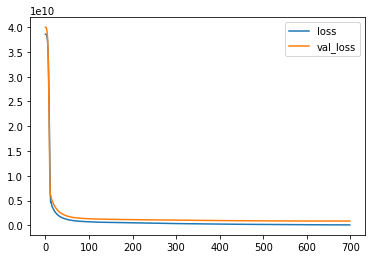

In [245]:
losses.plot()

In [246]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [247]:
predictions = model.predict(X_test)

In [248]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [249]:
mean_squared_error(y_test, predictions) ** 0.5

29725.012959285337

In [250]:
df_predict = src_df[src_df['source'] == 'test'].drop(['source','SalePrice'], axis = 1 )
sample = df_predict.iloc[0][1:].values.reshape(-1, 288)
model.predict(scaler.transform(sample))[0][0]

130998.64

In [251]:
df_predict = src_df[src_df['source'] == 'test']
df_predict = df_predict.drop(['source','SalePrice'], axis = 1)
df_predict = df_predict.fillna(df.mean())

In [252]:
import time

In [253]:
suffix = time.strftime('%Y%m%d_%H%M')
filename =  'kaggle_house_prediction_' + suffix + '.csv'
f = open(filename, 'w+')
f.write('Id,SalePrice\r\n')
for i in range(len(df_predict)): #range(100):
    curr = df_predict.iloc[i][1:].values.reshape(-1, 288)
    predict = model.predict(scaler.transform(curr))
    if i%50 == 0: print(i)
    f.write(str(int(df_predict.iloc[i][0]))+','+str(predict[0][0]) + '\r\n')

f.close()    
    
#     curr = d.drop('Id', axis=1)
#     curr = scaler.transform(d.drop('Id', axis=1).values.reshape(-1, 19))
#     predict = model.predict(curr)
#     print(d['Id'], predict[0])


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [254]:
X_train.shape

(978, 288)

In [255]:
from tensorflow.keras.models import load_model

In [256]:
model.save('kaggle_house_price_prediction_20200607.h5')

In [257]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            multiple                  83232     
_________________________________________________________________
dense_289 (Dense)            multiple                  83232     
_________________________________________________________________
dense_290 (Dense)            multiple                  73984     
_________________________________________________________________
dense_291 (Dense)            multiple                  257       
Total params: 240,705
Trainable params: 240,705
Non-trainable params: 0
_________________________________________________________________
